In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [106]:
# loading the dataset
gl = pd.read_csv('glass.csv')
gl

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [110]:
# here we don't need the id column as it is only serial numbers so we drop it
# dropping the id column
gl.drop(columns = 'Id', axis = 1, inplace = True)

In [112]:
# checking any null values present in dataset
gl.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
# there is no any null values there

In [113]:
# loading top 5 rows
gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [114]:
gl.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [115]:
label = gl['Type']

In [116]:
# as we don't have to do anything with Type of glass so deleting the column for work and we will get it later
del gl['Type']

In [79]:
# here as we can see that the percentage contains of different chemicals in the glass like some contains around 1%, some
# around 13% and some around 71 to 72% and in this dataset we can not apply our machine learning algorithm because
# if we apply that it will biased to higher percentage.
# so to apply our ml algorithm we need to normalize our data

In [117]:
# normalizing the data
result =  gl.copy()
for i in gl.columns:
    max_value = gl[i].max()
    min_value = gl[i].min()
    result[i] = (gl[i] - min_value) / (max_value - min_value)
    
result

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [118]:
# giving the normalize data a variable name glass
glass = result

In [119]:
# loading top 5 rows of normalized data
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [41]:
# here we can see that the data is normalized around same range 0 to 1 percentage

In [120]:
glass['Type'] = label

In [121]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


In [122]:
# getting information of data of the dataframe
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [123]:
label = glass['Type']
del glass['Type']

In [124]:
# getting only first row
glass.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0


In [42]:
# Analysis of data

<AxesSubplot:>

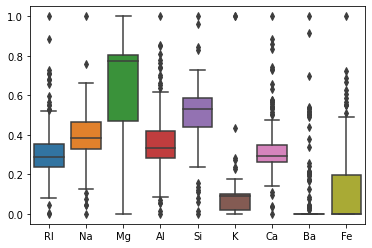

In [125]:
# making boxplot
sns.boxplot(data = glass)

In [126]:
glass['Type'] = label

In [128]:
# showing the total values present of different types of glass in dataframe
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

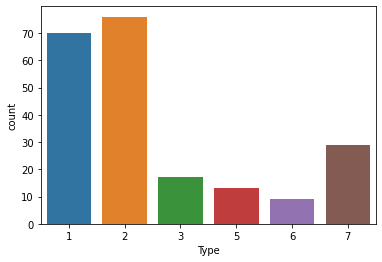

In [129]:
# making countplot of this
sns.countplot(x = 'Type', data = glass)

In [95]:
# from here we can see that the most number of glasses are of type 1 and 2 i.e. window glass.

In [130]:
# importing some more required libraries
from scipy import stats

In [131]:
glass = glass[(np.abs(stats.zscore(glass)) < 3).all(axis = 1)]

In [132]:
len(glass)

194

In [133]:
# importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [134]:
y = glass['Type']
del glass['Type']

In [135]:
x = glass

In [136]:
# splitting the data into train data and test data, taking 25% data into as data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 324 )

In [137]:
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
25,0.284899,0.338346,0.788419,0.286604,0.569643,0.104670,0.288104,0.000000,0.000000
26,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000
138,0.245391,0.309774,0.783964,0.389408,0.633929,0.106280,0.229554,0.000000,0.000000
64,0.464004,0.413534,0.832962,0.190031,0.392857,0.028986,0.388476,0.000000,0.137255
141,0.323090,0.371429,0.808463,0.242991,0.539286,0.091787,0.276952,0.028571,0.333333


In [138]:
# getting the shape of x_train data
x_train.shape

(145, 9)

In [139]:
# getting shape of y_train data
y_train.shape

(145,)

In [141]:
# getting top 5 y_train data 
y_train.head()

25     1
26     1
138    2
64     1
141    2
Name: Type, dtype: int64

In [142]:
accuracy = []

In [143]:
knn_ac = []
k_value = range(1,10)

In [145]:
# importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [146]:
# taking the neighbors of training data and accuracy score
knn = KNeighborsClassifier(n_neighbors = 2, p = 2, metric = 'minkowski')
# we have taken 2 neighbors and counting the distance by 'minkowski' metric.
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
a = accuracy_score(y_true = y_test, y_pred = predictions)*100
accuracy.append(a)

In [147]:
for i in k_value:
    a = []
    
    knn = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'minkowski', weights = 'distance')
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)
    
    knn_ac.append(a)

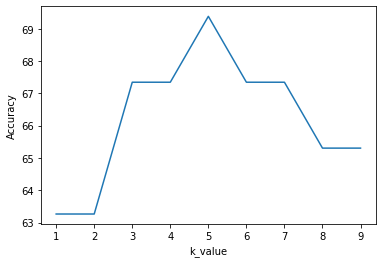

In [150]:
# plotting the accuracy according to number of neighbors into graph
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.plot(k_value, knn_ac)
plt.show()

In [151]:
# from here we can see that when we take 5 neighbors we get maximum accuracy
# and for choosing these neighbors those who have minimum distance will given more priority

In [180]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier

In [181]:
a = []

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

77.55102040816327